In [1]:
import importlib
import DTS_processing_functions
importlib.reload(DTS_processing_functions)
from DTS_processing_functions import *
from tqdm import tqdm

In [2]:
spy =  3.154e+7 
k_diff = 1.09e-6 * spy

tmin = 1923
tmax = 2023
num_steps = 101
depth=20
nz=21

In [5]:
num_steps = 50
nz=25

t = np.linspace(0.0001,500,num_steps)
z = np.linspace(0.0001,250,nz)

## Creat a synthetic temeprature signal

Text(0.5, 0, 'Years Before Present')

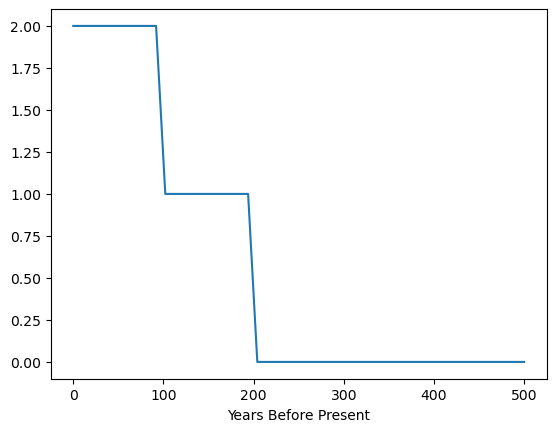

In [8]:
syn_temp = np.zeros(len(t))
stop = int(.3*len(t))
syn_temp[:10] = 2
syn_temp[10:20] = 1
syn_temp[20:] = 0


fig,ax = plt.subplots()
ax.plot(t,syn_temp)
ax.set_xlabel('Years Before Present')

## Forward model the borehole
We will do this analytically by usung the equation from fig 1 above
See equation 4 from Mareschal and Beltrami 1992

<IPython.core.display.Javascript object>


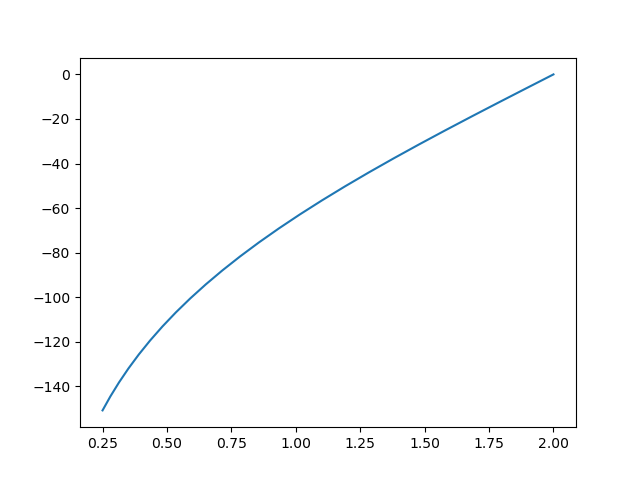

In [121]:
t_hist = np.zeros((len(t),len(z)))
for q in range(len(t)-1):
    T_z = np.zeros(len(z))
    for k,j in enumerate(z):
        temp = syn_temp[q] - syn_temp[q+1]
        T = temp*math.erfc(j/ (2*np.sqrt(k_diff*t[q])))
#         print(T)
        T_z[k]=T
    t_hist[q,:] = T_z
borehole_syn=np.sum(t_hist,axis=0)

fig,ax=plt.subplots()
ax.plot(borehole_syn,z*-1)

## Can we do the inversion with real data?

['files_sorted/ALHIC1901_23_5min', 'files_sorted/ALHIC1903_23_5min', 'files_sorted/ALHIC1902_23_5min', 'files_sorted/ALHIC2301_23_5min', 'files_sorted/ALHIC2201_23_5min', 'files_sorted/ALHIC1901_23_30min', 'files_sorted/ALHIC1902_23_30min', 'files_sorted/ALHIC1902_23_10sec', 'files_sorted/ALHIC1901_22_30min']
11 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/io.py:1834: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  for k, v in coords_zip}
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:309: RuntimeWarning: invalid value encountered in log
  i_f = np.log(st / ast)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:310: RuntimeWarning: invalid value encountered in log
  i_b = np.log(rst / rast)


I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3182: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3195: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15


31 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/io.py:1834: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  for k, v in coords_zip}
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:309: RuntimeWarning: invalid value encountered in log
  i_f = np.log(st / ast)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:310: RuntimeWarning: invalid value encountered in log
  i_b = np.log(rst / rast)


I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3182: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3195: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15


7 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/io.py:1834: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  for k, v in coords_zip}
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:309: RuntimeWarning: invalid value encountered in log
  i_f = np.log(st / ast)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:310: RuntimeWarning: invalid value encountered in log
  i_b = np.log(rst / rast)


I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3182: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3195: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15


13 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/io.py:1834: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  for k, v in coords_zip}
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:309: RuntimeWarning: invalid value encountered in log
  i_f = np.log(st / ast)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:310: RuntimeWarning: invalid value encountered in log
  i_b = np.log(rst / rast)


I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3182: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3195: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15


2 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk
I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/io.py:1834: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  for k, v in coords_zip}
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:309: RuntimeWarning: invalid value encountered in log
  i_f = np.log(st / ast)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:310: RuntimeWarning: invalid value encountered in log
  i_b = np.log(rst / rast)


I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3182: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3195: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15


1 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk
I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/io.py:1834: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  for k, v in coords_zip}
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:309: RuntimeWarning: invalid value encountered in log
  i_f = np.log(st / ast)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:310: RuntimeWarning: invalid value encountered in log
  i_b = np.log(rst / rast)


I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3182: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3195: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15


7 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/io.py:1834: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  for k, v in coords_zip}
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:309: RuntimeWarning: invalid value encountered in log
  i_f = np.log(st / ast)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:310: RuntimeWarning: invalid value encountered in log
  i_b = np.log(rst / rast)


I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3182: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3195: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15


78 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/io.py:1834: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  for k, v in coords_zip}
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:309: RuntimeWarning: invalid value encountered in log
  i_f = np.log(st / ast)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:310: RuntimeWarning: invalid value encountered in log
  i_b = np.log(rst / rast)


I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3182: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3195: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15


3 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3553 points along the cable
The measurement is double ended
Reading the data from disk


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/io.py:1834: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  for k, v in coords_zip}
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:309: RuntimeWarning: invalid value encountered in log
  i_f = np.log(st / ast)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore_utils.py:310: RuntimeWarning: invalid value encountered in log
  i_b = np.log(rst / rast)


I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3182: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3195: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-pa

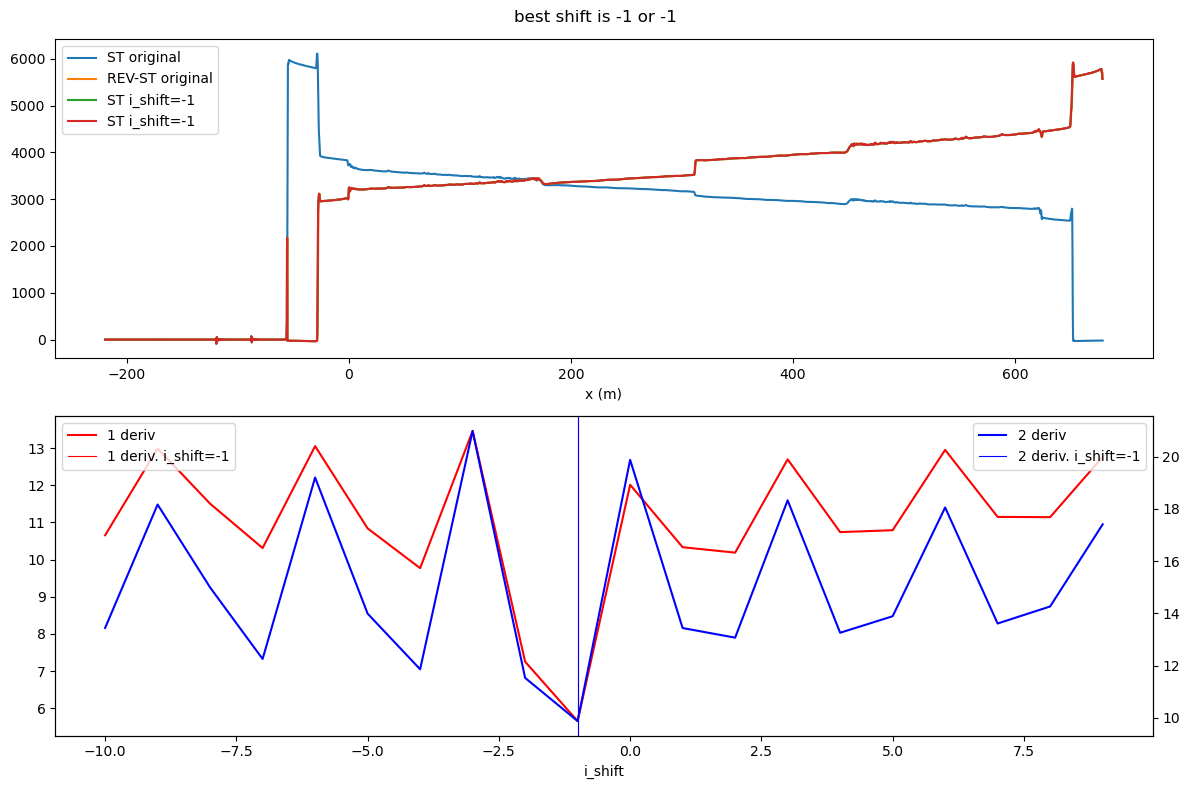

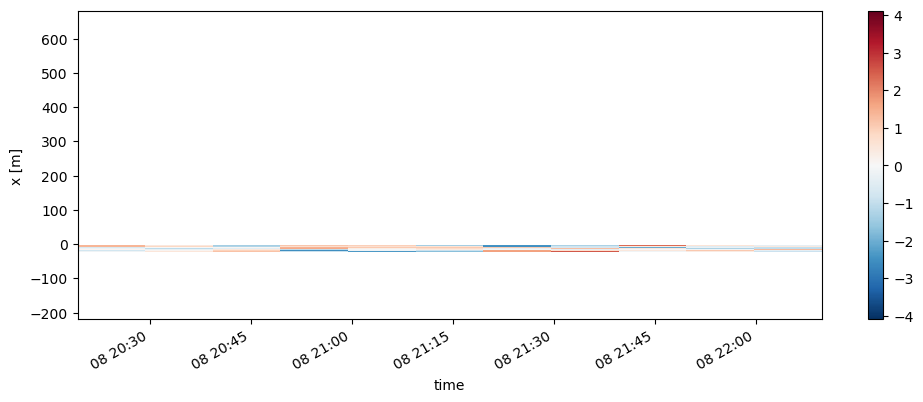

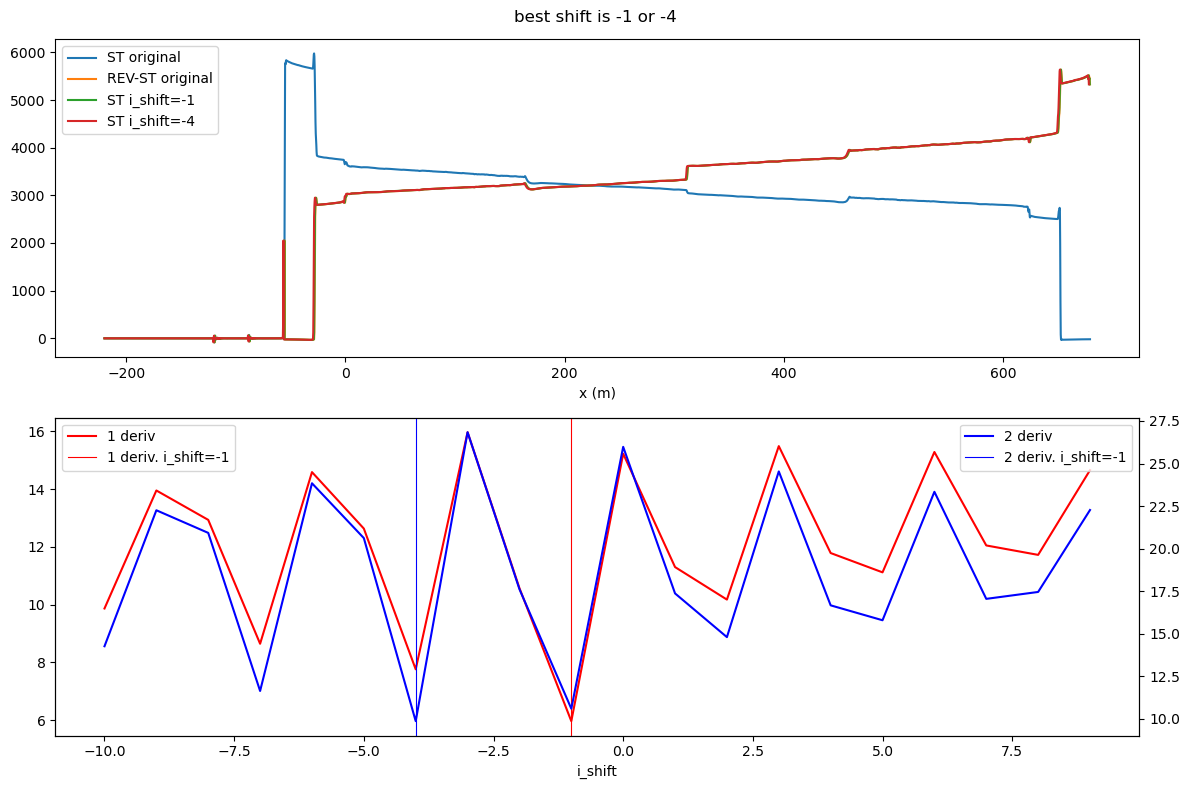

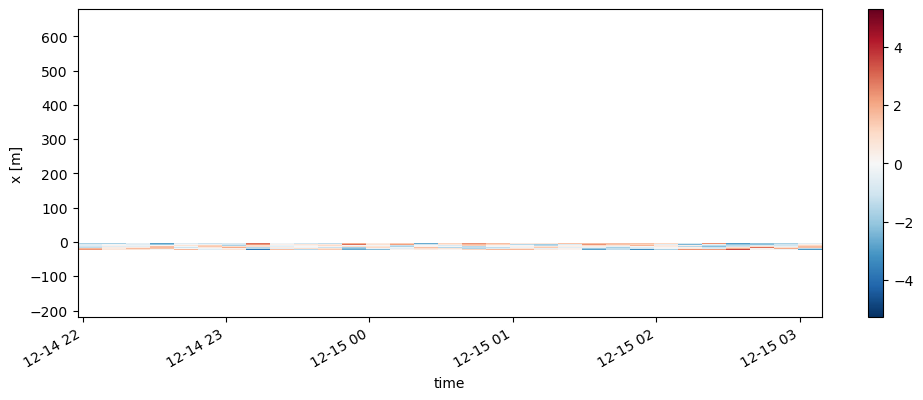

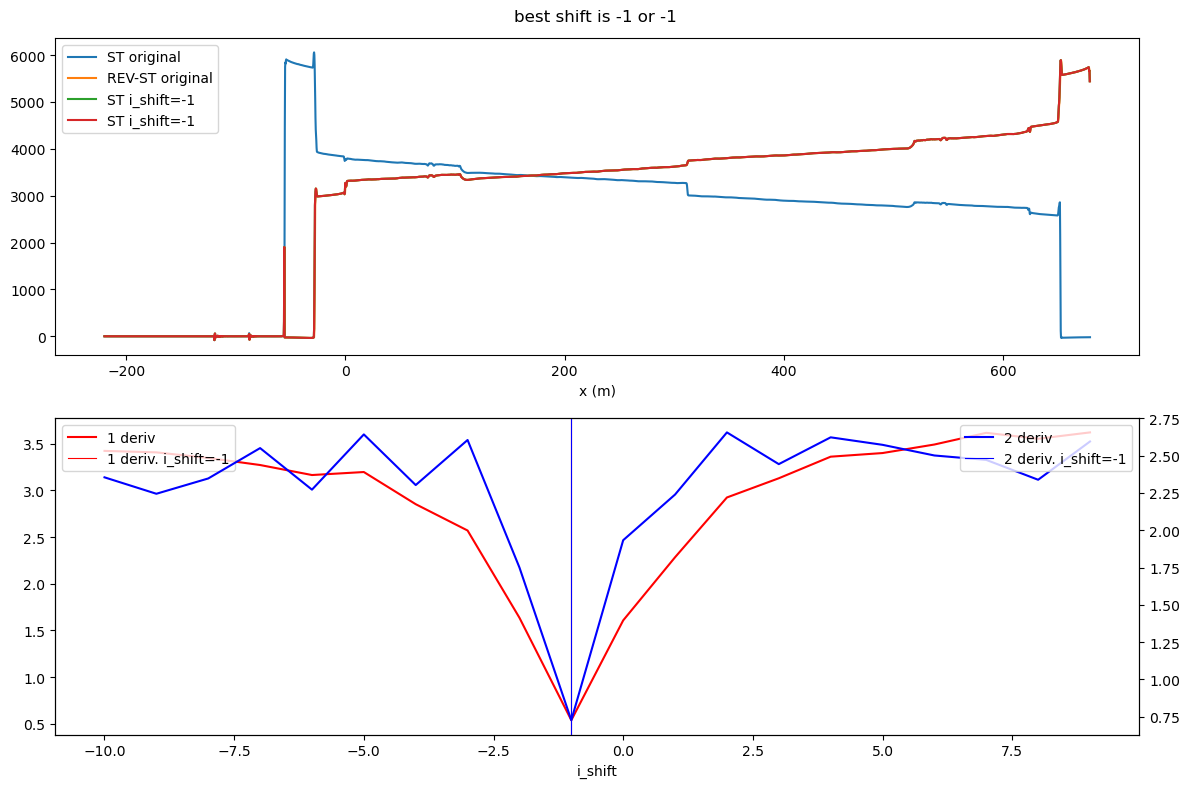

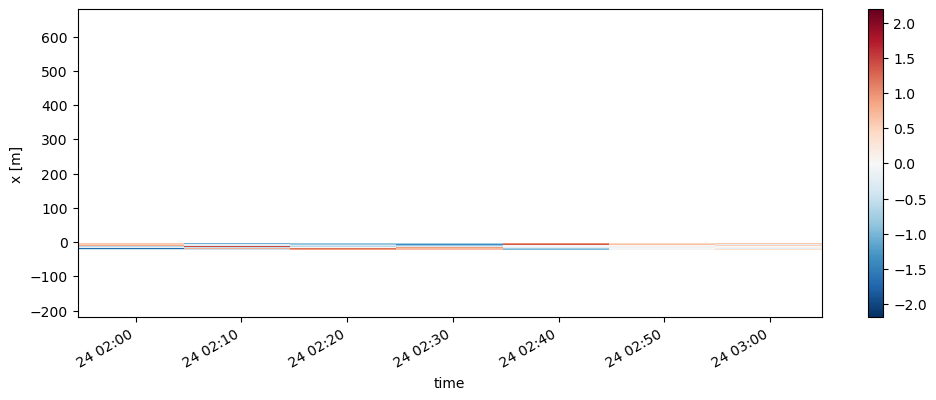

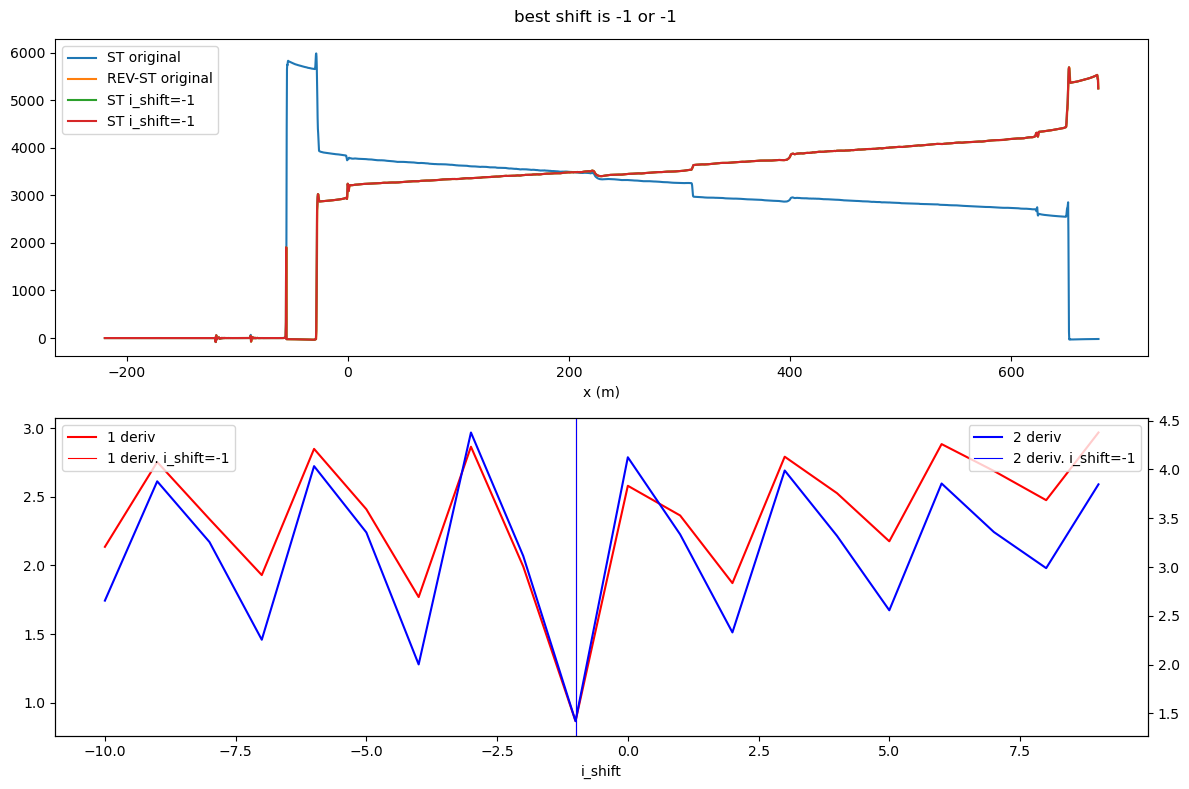

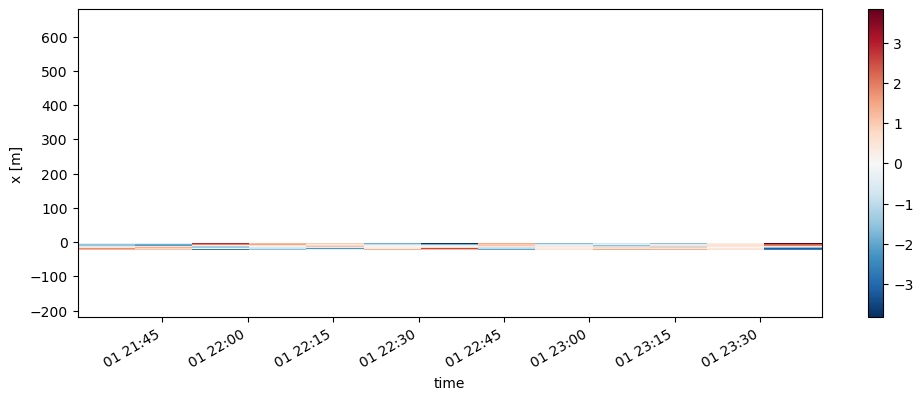

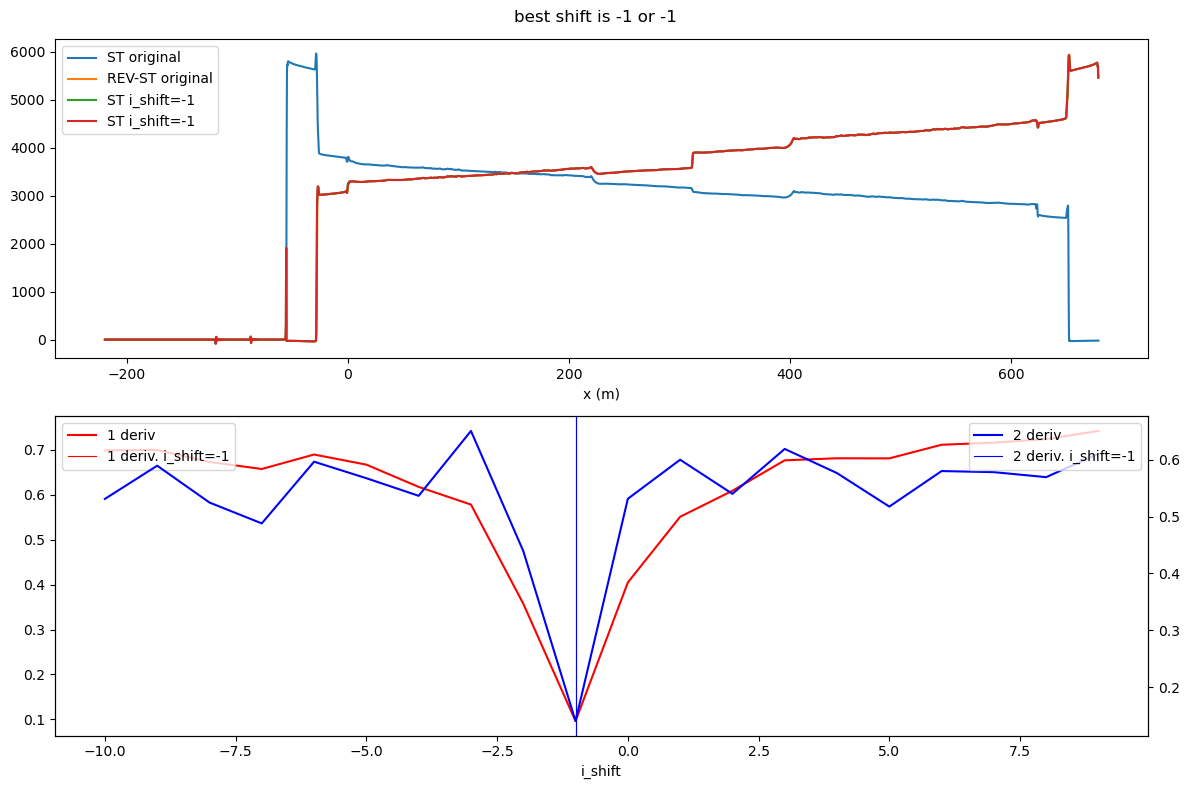

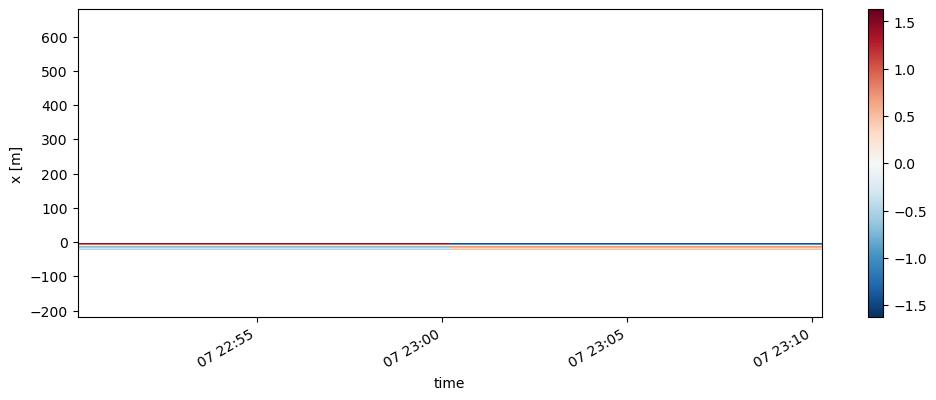

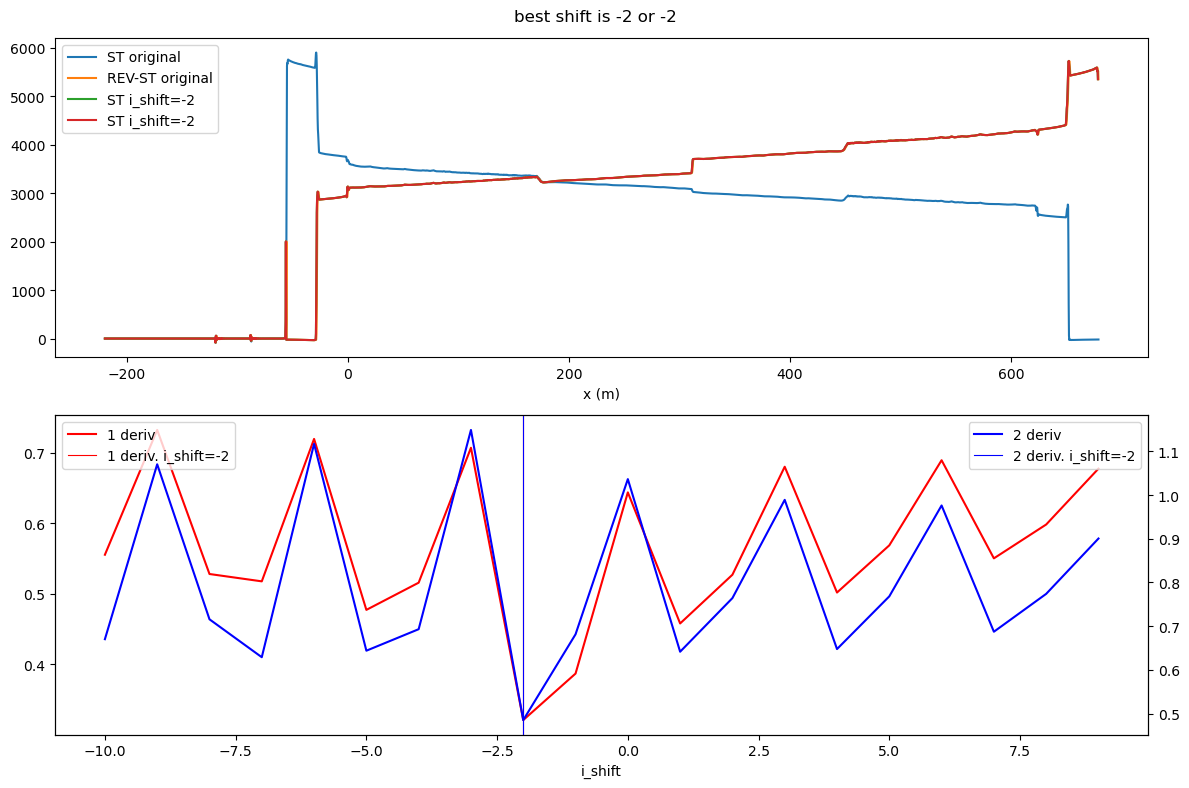

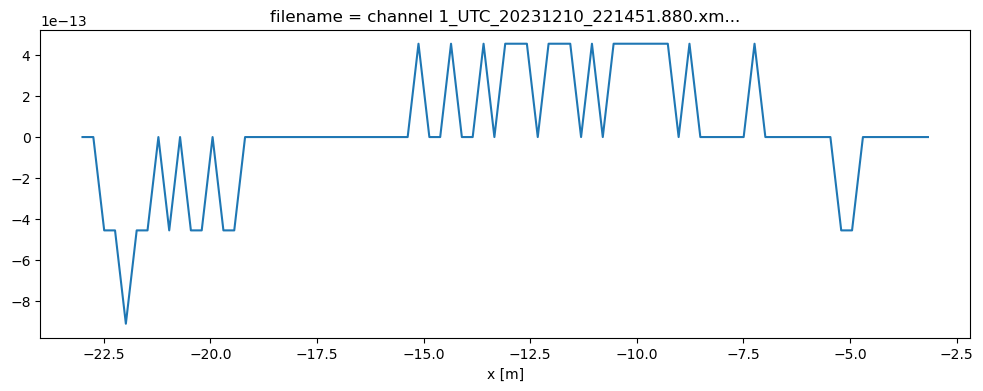

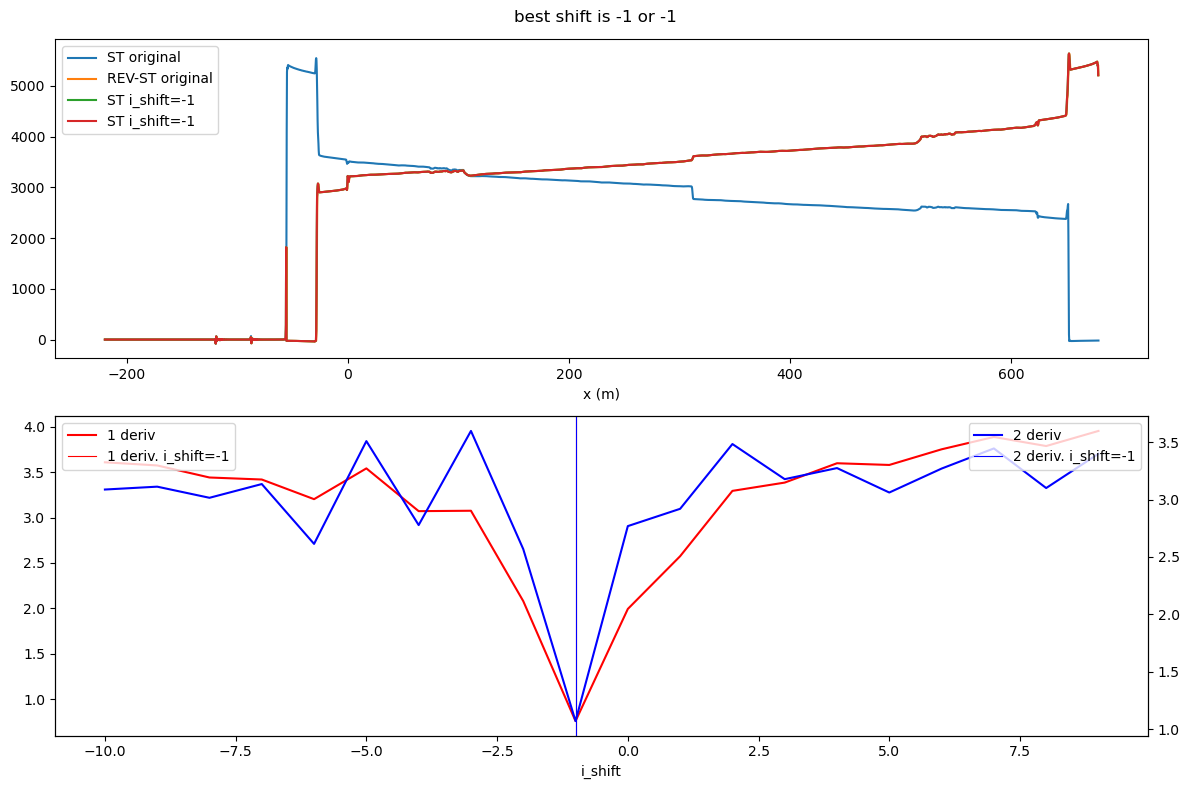

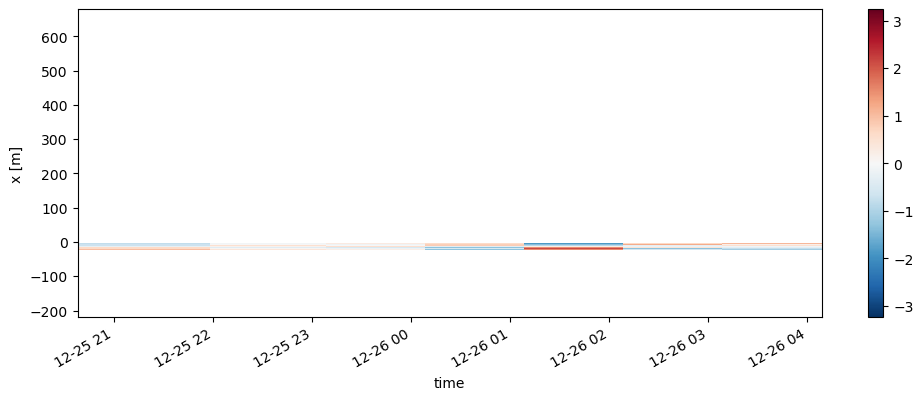

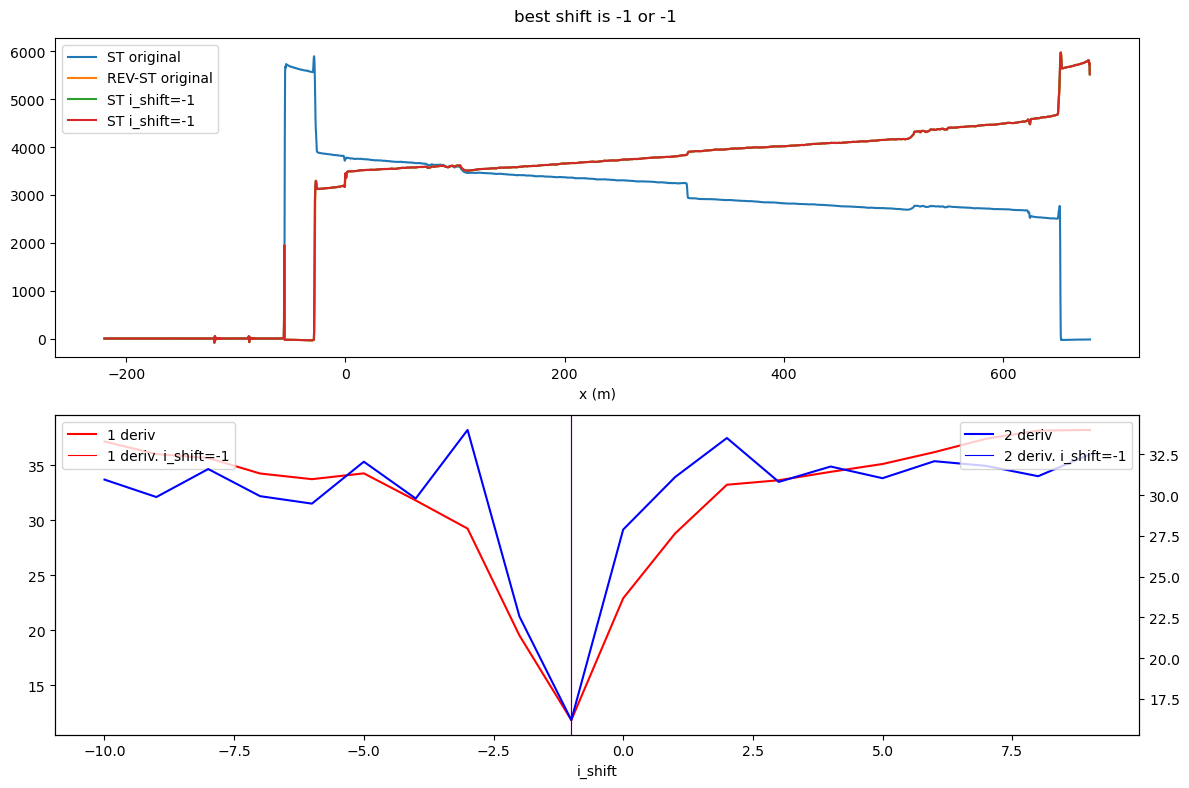

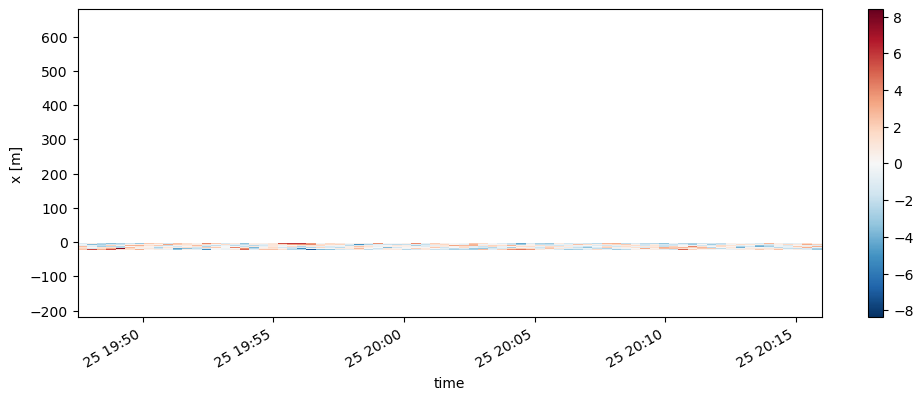

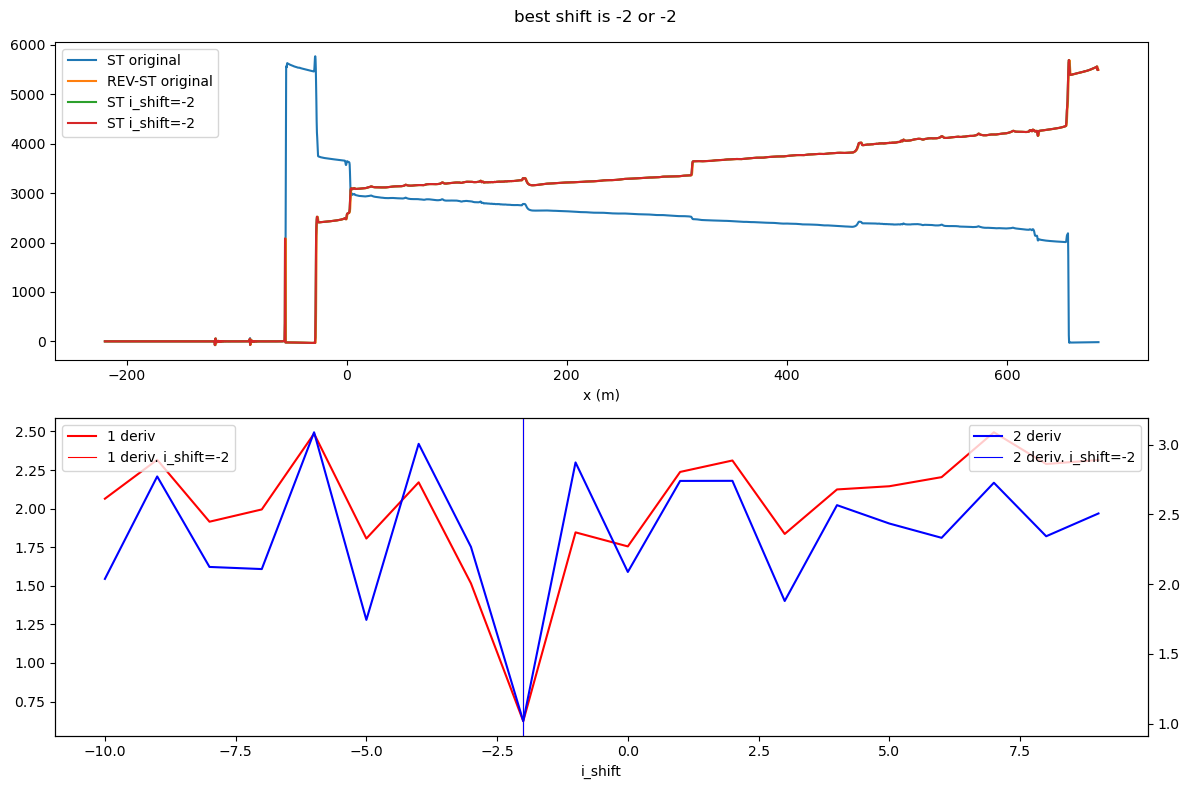

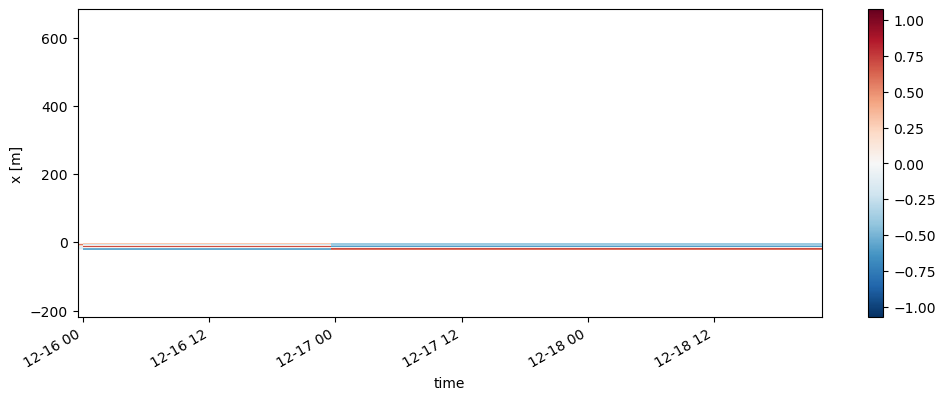

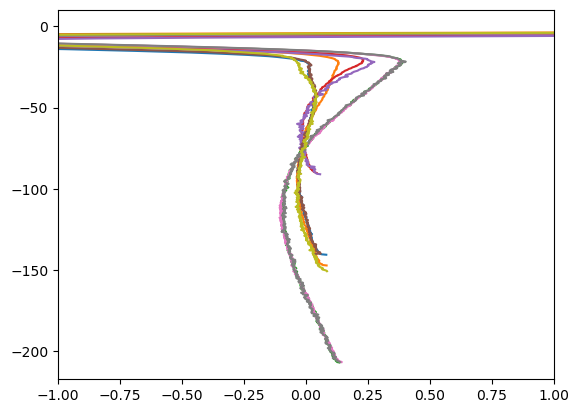

In [14]:
## matching sections of the cable
matching_sections_dict = {
    ## (downgoing side) (upgoing side) and True because this has a forward and reverse part
    'ALHIC1901_22_30min': [(slice(-27.08, 312.815), slice(314.815, 654.71), True), [313.3]],
    'ALHIC1901_23_5min': [(slice(-26.3, 311.2), slice(313, 650.14), True), [311.2]],
    'ALHIC1903_23_5min': [(slice(-26.3, 311.2), slice(313, 650.14), True), [311.2]],
    'ALHIC1902_23_5min': [(slice(-26.3, 311.2), slice(313, 650.14), True), [311.2]],
    'ALHIC2301_23_5min': [(slice(-26.3, 311.2), slice(313, 650.14), True), [311.2]],
    'ALHIC2201_23_5min': [(slice(-26.3, 311.2), slice(313, 650.14), True), [311.2]],
    'ALHIC1901_23_30min': [(slice(-26.3, 311.2), slice(313, 650.14), True), [311.2]], 
    'ALHIC1902_23_30min': [(slice(-26.3, 311.2), slice(313, 650.14), True), [311.2]], 
    'ALHIC1902_23_10sec': [(slice(-26.3, 311.2), slice(313, 650.14), True), [311.2]]
}
    
adjust_the_geoflux = 20

geometry = {
    ## top of borehole, below seasonal signal, bottom of borehole
    'ALHIC1901_22_30min': [162.05, 185.05+adjust_the_geoflux, 313.05],
    'ALHIC1901_23_5min': [170.43, 193.43+adjust_the_geoflux, 311.04],
    'ALHIC1903_23_5min': [163.82, 186.82+adjust_the_geoflux, 311.04],
    'ALHIC1902_23_5min': [104.07, 127.07+adjust_the_geoflux, 311.04],
    'ALHIC2301_23_5min': [220.75, 243.75+adjust_the_geoflux, 311.04],
    'ALHIC2201_23_5min': [220.0, 243.0+adjust_the_geoflux, 311.04],
    'ALHIC1901_23_30min': [170.93, 193.93+adjust_the_geoflux, 311.04], 
    'ALHIC1902_23_30min': [104.30, 127.30+adjust_the_geoflux, 311.04], 
    'ALHIC1902_23_10sec': [104.30, 127.30+adjust_the_geoflux, 311.04]
}

### List of the file paths to process ###
filepaths = glob.glob('files_sorted/*')
print(filepaths)

data = {}
for i in filepaths:
    ds = data_processing_matching_sections(i, matching_sections_dict)
    data[i[13:]] = ds

data_proc = {}
for i in data:
    data_proc[i] = borehole_data_reader(data, i, geometry)
    
fig, ax = plt.subplots()

anomalies = {}
for i in data_proc:
    x = data_proc[i][0]
    anomaly = data_proc[i][8]
    anomalies[i]=anomaly
    ax.plot(anomaly, x*-1)
ax.set_xlim([-1,1])
plt.show()

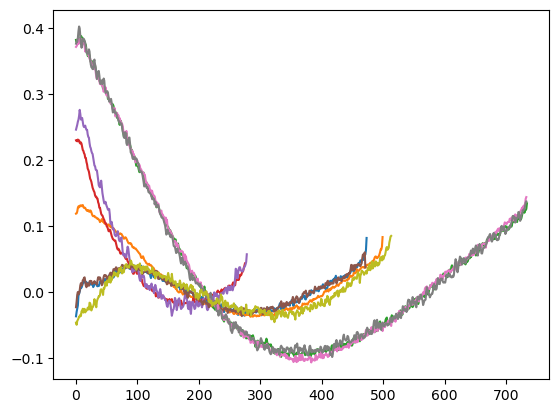

In [15]:
m_realData ={}
fig,ax = plt.subplots()

for i in anomalies:
#     print(anomalies[i].values)
    anomaly=anomalies[i].values[80:]
    inversed_realDate = inverser_SVD(A_jk,anomaly,nz=nz,p=5)
    ax.plot(anomaly)
    m_realData[i] = inversed_realDate[0]

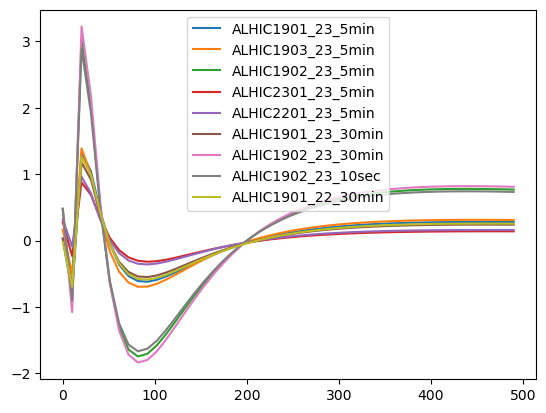

In [18]:
fig,ax = plt.subplots()
for i in m_realData:
    ax.plot(t[:-1],m_realData[i], label=i)
plt.legend()
plt.show()

## Create the Greens functions according to Beltrami et al., 1996

In [209]:
num_steps = 20
nz=25
tmax = 200
t = np.linspace(0.0001,tmax,num_steps)


<IPython.core.display.Javascript object>


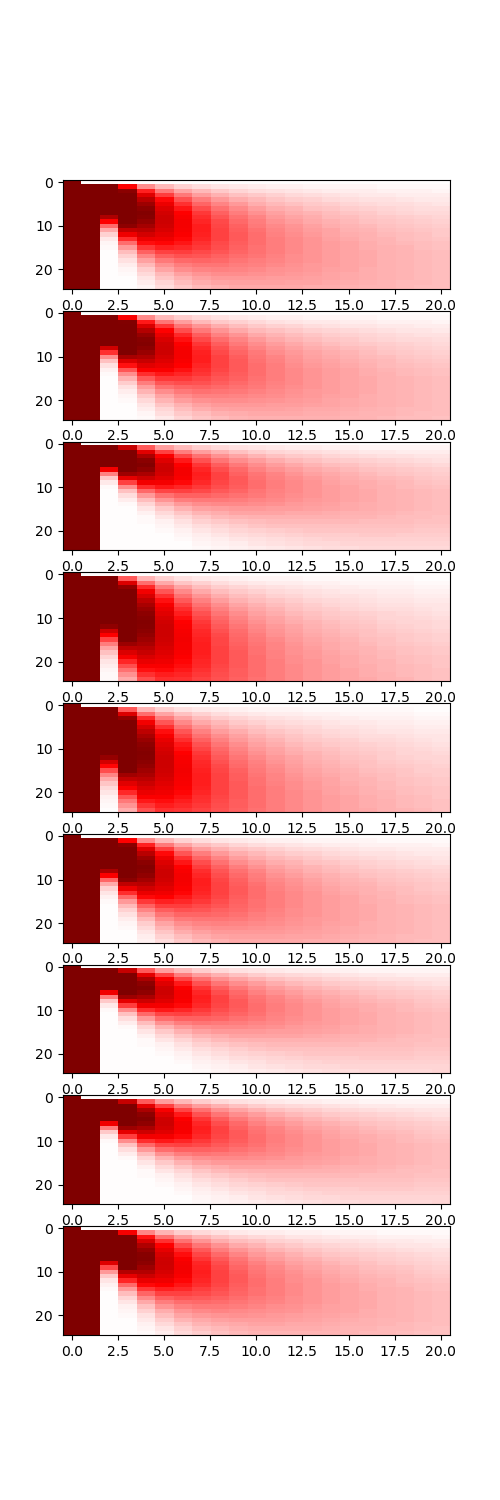

In [210]:
fig,axes = plt.subplots(len(data_proc), 1, figsize=[5,15])
v=.1

A_jk_boreholes = {}
z_s = {}
for name,ax in zip(data_proc,axes):
    depth = data_proc[name][6]
    z = np.linspace(0.0001,depth,nz)
    A_jk = np.zeros((len(z),len(t)-1 + 2))
    A_jk[:,0] = 1
    A_jk[:,1] = z/2.22
    for i in range(len(t)-1):
        T_z = np.zeros(len(z))
        for k,j in enumerate(z):
            T =  math.erfc(j/ (2*np.sqrt(k_diff*t[i+1]))) - math.erfc(j/ (2*np.sqrt(k_diff*t[i])))
            T_z[k]=T
    #     ax.plot(T_z, z*-1)
        A_jk[:,i+2]=T_z

    z_s[name] = z
    A_jk_boreholes[name] = A_jk    
    ax.imshow(A_jk,cmap='seismic', vmin=-v,vmax=v, aspect='auto')
plt.show()

## Now do the inversions

In [211]:
#Use a cutoff here to get below the seasonal signal
cutoff = 80

inversed_Beltrami = {}
for i in A_jk_boreholes:
    borehole_temp = data_proc[i][2].values[cutoff:]
    inversed_Beltrami[i] = inverser_SVD(A_jk_boreholes[i],borehole_temp,nz=nz,p=6)


<IPython.core.display.Javascript object>


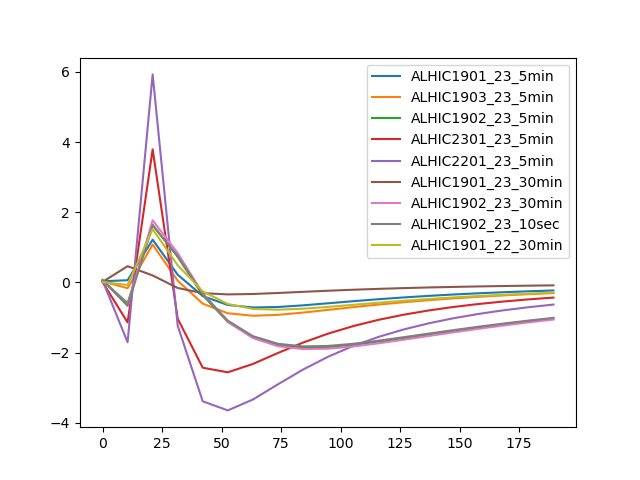

In [212]:
%matplotlib notebook
fig,ax = plt.subplots()
for i in inversed_Beltrami:
    ax.plot(t[:-1],inversed_Beltrami[i][0][2:], label=i)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


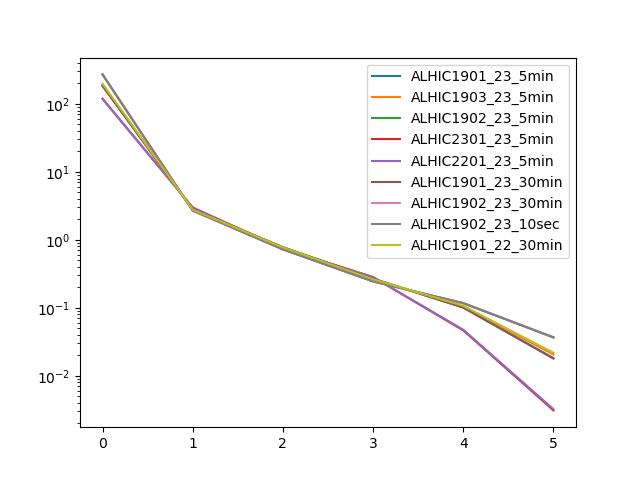

In [213]:
fig,ax = plt.subplots()
for i in inversed_Beltrami:
    ax.plot(np.diag(inversed_Beltrami[i][2]), label=i,)
plt.legend()
plt.yscale('log')
plt.show()

<IPython.core.display.Javascript object>


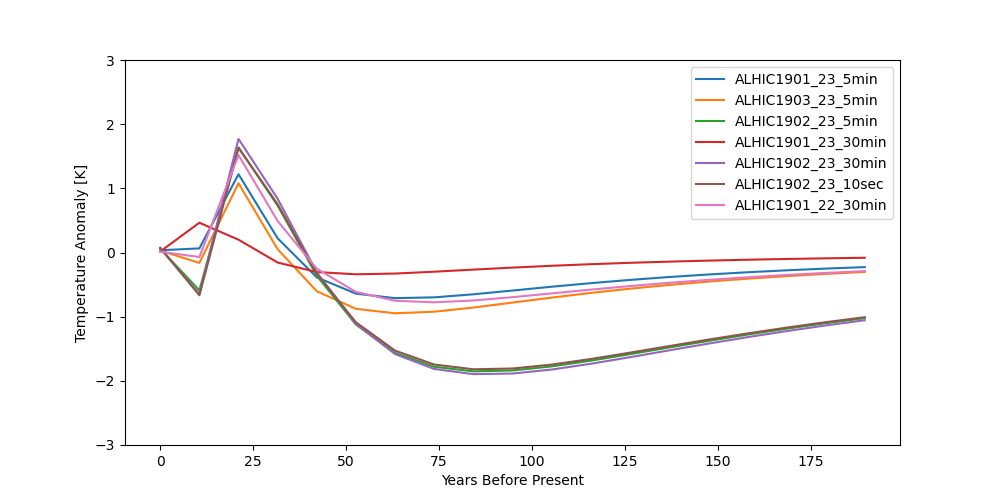

-31.51909432056212
-31.08425330105356
-31.90281172725734
-30.50943175470187
-31.75037329449116
-32.25961580187264
-31.081861344567034


(-3.0, 3.0)

In [262]:
fig,ax = plt.subplots(figsize=[10,5])
for i in inversed_Beltrami:
    if i == 'ALHIC2301_23_5min':
        continue
    elif i == 'ALHIC2201_23_5min':
        continue
    else:
        ax.plot(t[:-1],inversed_Beltrami[i][0][2:], label=i)
        print(inversed_Beltrami[i][0][0])
plt.legend()
plt.ylabel('Temperature Anomaly [K]')
plt.xlabel('Years Before Present')
plt.ylim([-3,3])

# Forward model these temperature histories and compare to the borehole

In [215]:
foreword_boreholes = {}

for name in inversed_Beltrami:
    temp_history = inversed_Beltrami[name][0][2:] + inversed_Beltrami[name][0][0]
    T_0 = inversed_Beltrami[name][0][0]
    t_hist = np.zeros((len(temp_history),len(z)))
    for q in range(len(temp_history)-1):
        T_z = np.zeros(len(z))
        for k,j in enumerate(z):
            temp = temp_history[q] - temp_history[q+1]
            T = temp*math.erfc(j/ (2*np.sqrt(k_diff*t[q])))
    #         print(T)
            T_z[k]=T
        t_hist[q,:] = T_z
    foreword_boreholes[name] = np.sum(t_hist,axis=0)

<IPython.core.display.Javascript object>


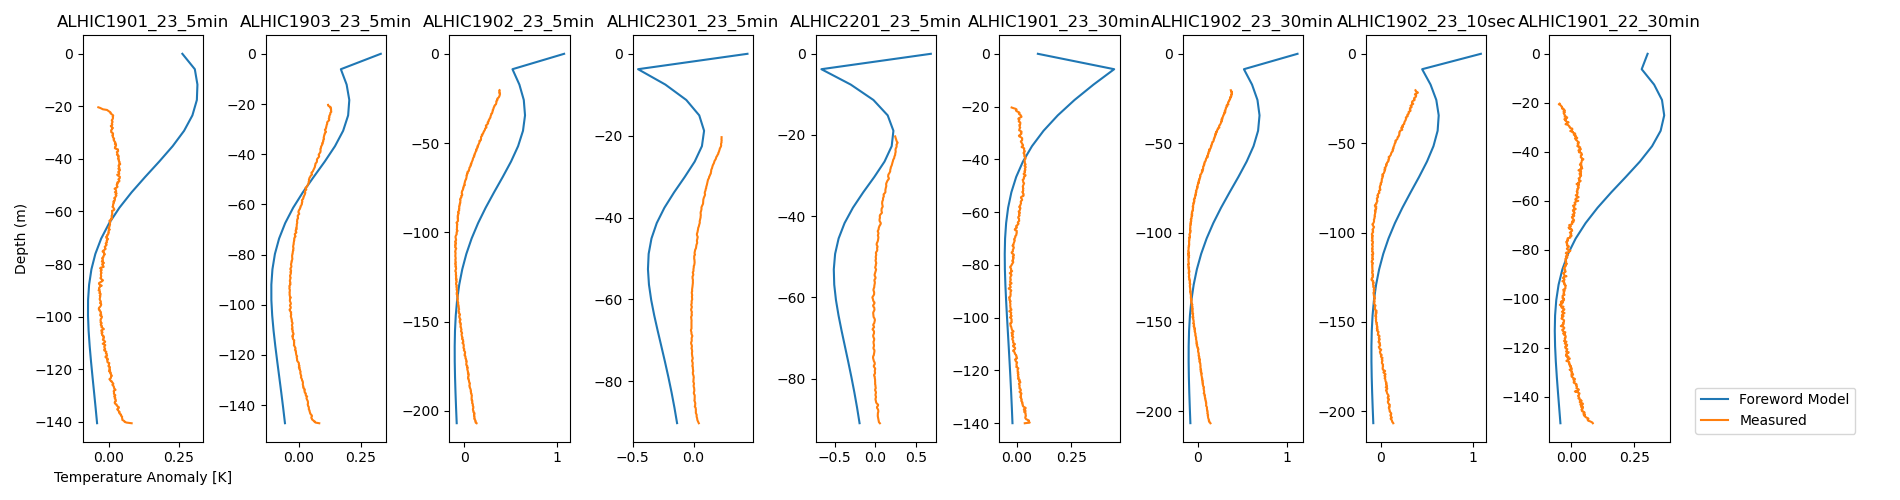

In [234]:
fig, axes = plt.subplots(1, len(foreword_boreholes), figsize=[19,5])

for i, (name, ax) in enumerate(zip(foreword_boreholes,axes)):
    ax.plot(foreword_boreholes[name],z_s[name]*-1, label='Foreword Model')
    ax.plot(data_proc[name][8][cutoff:],data_proc[name][0][cutoff:]*-1, label='Measured')
    ax.set_title(name)
    if i == 0:
        ax.set_ylabel('Depth (m)')
        ax.set_xlabel('Temperature Anomaly [K]')

    if i == 8:
        ax.legend(bbox_to_anchor=[2.6,0.15])


plt.tight_layout()

# Superimpose Byrd data

<IPython.core.display.Javascript object>


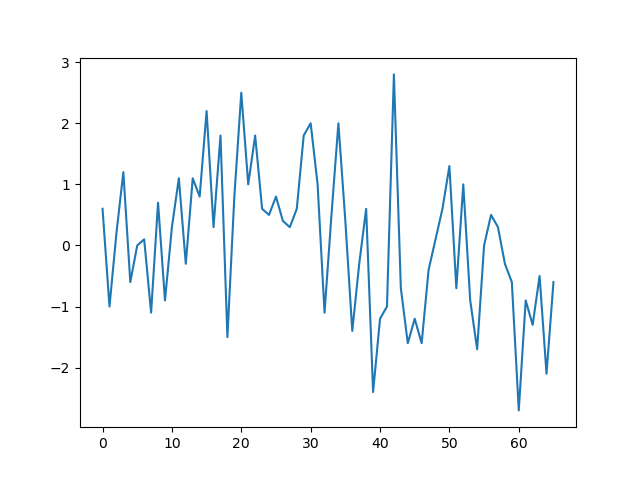

In [253]:
byrd_data = np.genfromtxt("temp_data/byrd_temps.csv", delimiter=",", usemask=False)
annual = byrd_data[1:,1]
annual_cal = annual +27 #Temperature adjustment for the Allan Hills
year = byrd_data[1:,0]

fig, ax = plt.subplots()
ax.plot((year-year[-1])*-1,annual_cal)
plt.show()

<IPython.core.display.Javascript object>


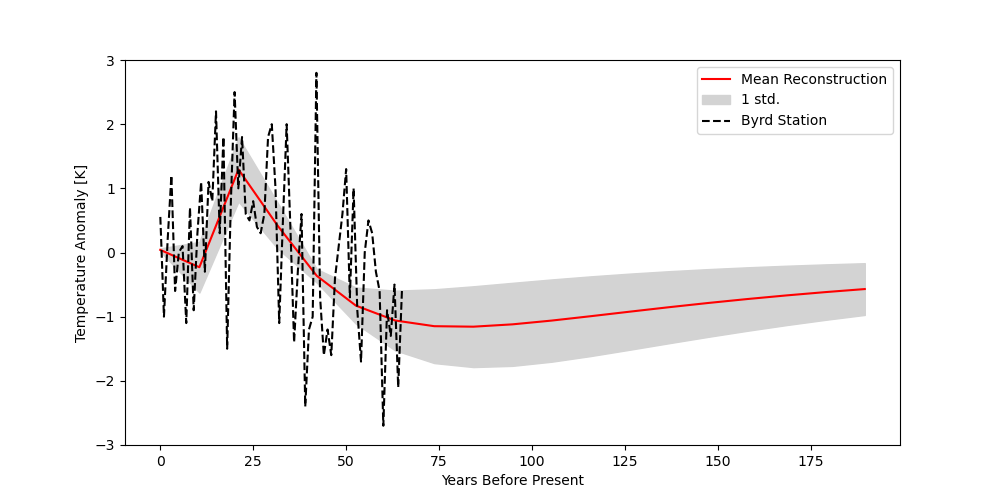

-31.51909432056212
-31.08425330105356
-31.90281172725734
-30.50943175470187
-31.75037329449116
-32.25961580187264
-31.081861344567034


Text(0.5, 0, 'Years Before Present')

In [282]:
m_est_all = []

fig,ax = plt.subplots(figsize=[10,5])
for i in inversed_Beltrami:
    if i == 'ALHIC2301_23_5min':
        continue
    elif i == 'ALHIC2201_23_5min':
        continue
    else:
#         ax.plot(t[:-1],inversed_Beltrami[i][0][2:], label=i)
        print(inversed_Beltrami[i][0][0])
        m_est_all.append(inversed_Beltrami[i][0][2:])
        
mean_m_est = np.mean(np.asarray(m_est_all), axis=0)
std=np.std(np.asarray(m_est_all), axis=0)
ax.plot(t[:-1],mean_m_est, label='Mean Reconstruction',color='red')
ax.fill_between(t[:-1],mean_m_est+std,  mean_m_est-std, label='1 std.', color='lightgrey')
ax.plot((year-year[-1])*-1,annual_cal, label = 'Byrd Station',ls='--',color='black')        
plt.legend()
plt.ylim([-3,3])
plt.ylabel('Temperature Anomaly [K]')
plt.xlabel('Years Before Present')